## **BIOINSIGHTS**

#Preprocessing

The incidence of liver disease has been rising due to factors such as excessive alcohol consumption, inhalation of harmful gases, ingestion of contaminated food, and use of certain pickles and drugs. This dataset was utilized to assess prediction algorithms aimed at alleviating the workload on healthcare providers.

It comprises 416 records of liver disease patients and 167 records of individuals without liver disease, gathered from the North East region of Andhra Pradesh, India. The "Dataset" column serves as a class label, distinguishing between liver disease patients and those without the disease. It includes 441 records of male patients and 142 records of female patients.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import IsolationForest
from matplotlib.cbook import boxplot_stats
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
patient = pd.read_csv('indian_liver_patient.csv')

We start analyzing our dataset using head() in order to see the data. Hence, we have to deal with one categorical column (Gender), and 10 numerical columns, including the target (Dataset)

In [ ]:
patient.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Next, let us check the null values present in our dataset, we will use info() as well as the heat map to visualize it better

In [ ]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


<Axes: >

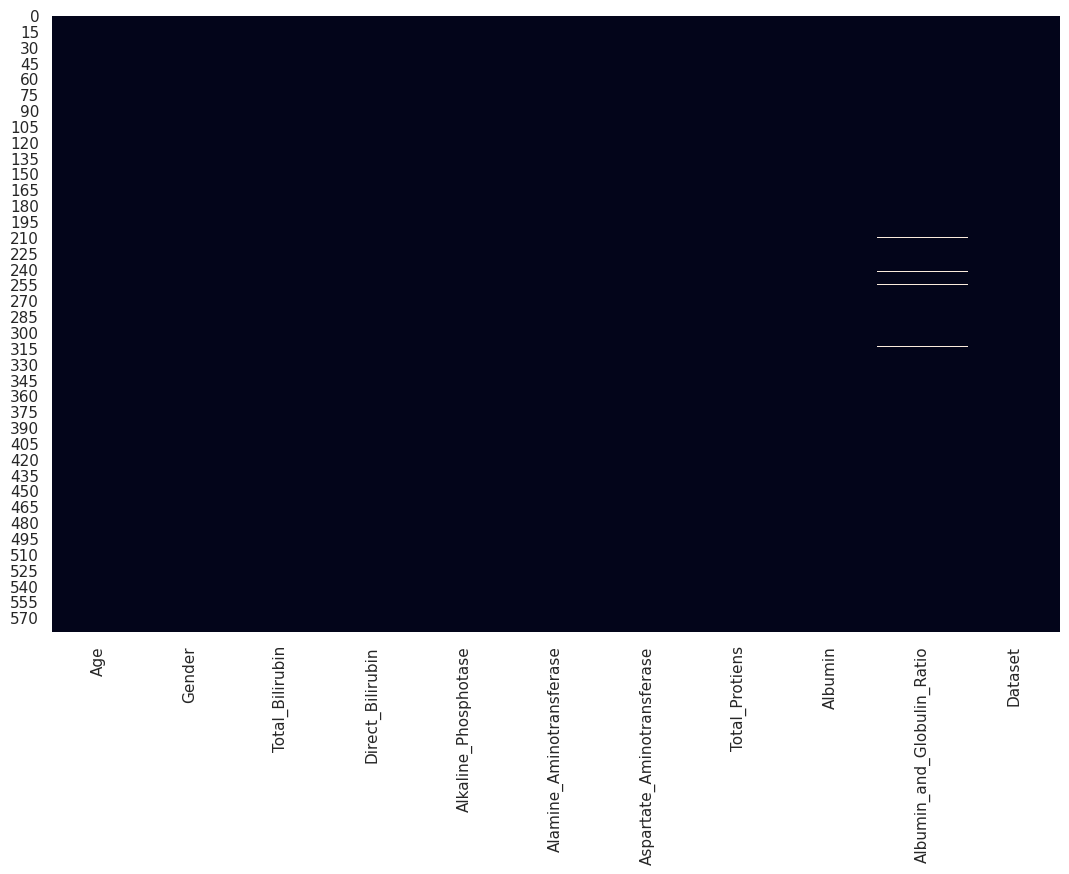

In [ ]:
import seaborn as sns
sns.set(rc={"figure.figsize":(13, 8)})
sns.heatmap(patient.isnull(), cbar=False)
#we use the heatmap in order to spot the null values, hence we see 4 missing values only

In [ ]:
patient['Albumin_and_Globulin_Ratio'].describe()

count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: Albumin_and_Globulin_Ratio, dtype: float64

Since we have one categorical column, we need to convert it to a numerical one either by get_dummies or map()/apply(). We will use map() since we need zeros and ones, not boolean values

In [ ]:
patient['Gender'] = patient['Gender'].map({'Male': 1, 'Female': 0}) #instead of get_dummies we use map()

In [ ]:
patient.rename(columns={'Gender': 'Male'}, inplace=True) #renaming the column accordingly
# we write inplace=True in order to save the change

In [ ]:
patient.head()

,Age,Male,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Now, null values can be either deleted (using dropna()) or replaced. Taking into account that our dataset is small and we have few missing values, we decided that it is better to replace them using MICE (Multiple Imputation by Chained Equations) - a statistical technique used for imputing missing data in datasets

In [ ]:

patient_miss_val1 = patient.copy()
imputer = IterativeImputer()

patient_miss_val1_imputed = imputer.fit_transform(patient_miss_val1)


patient_miss_val1 = pd.DataFrame(patient_miss_val1_imputed, columns=patient_miss_val1.columns)

print(patient_miss_val1.head()) #we use MICE to replace the null values more accurately

    Age  Male  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  65.0   0.0              0.7               0.1                 187.0   
1  62.0   1.0             10.9               5.5                 699.0   
2  62.0   1.0              7.3               4.1                 490.0   
3  58.0   1.0              1.0               0.4                 182.0   
4  72.0   1.0              3.9               2.0                 195.0   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                      16.0                        18.0             6.8   
1                      64.0                       100.0             7.5   
2                      60.0                        68.0             7.0   
3                      14.0                        20.0             6.8   
4                      27.0                        59.0             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90      1.0  
1   

In [ ]:
patient_miss_val1.info() #as we can see here, the null values were replenished

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    float64
 1   Male                        583 non-null    float64
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    float64
 5   Alamine_Aminotransferase    583 non-null    float64
 6   Aspartate_Aminotransferase  583 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    float64
dtypes: float64(11)
memory usage: 50.2 KB


Aside from info(), we can check this again using the heatmap. As such, we see no more null values

<Axes: >

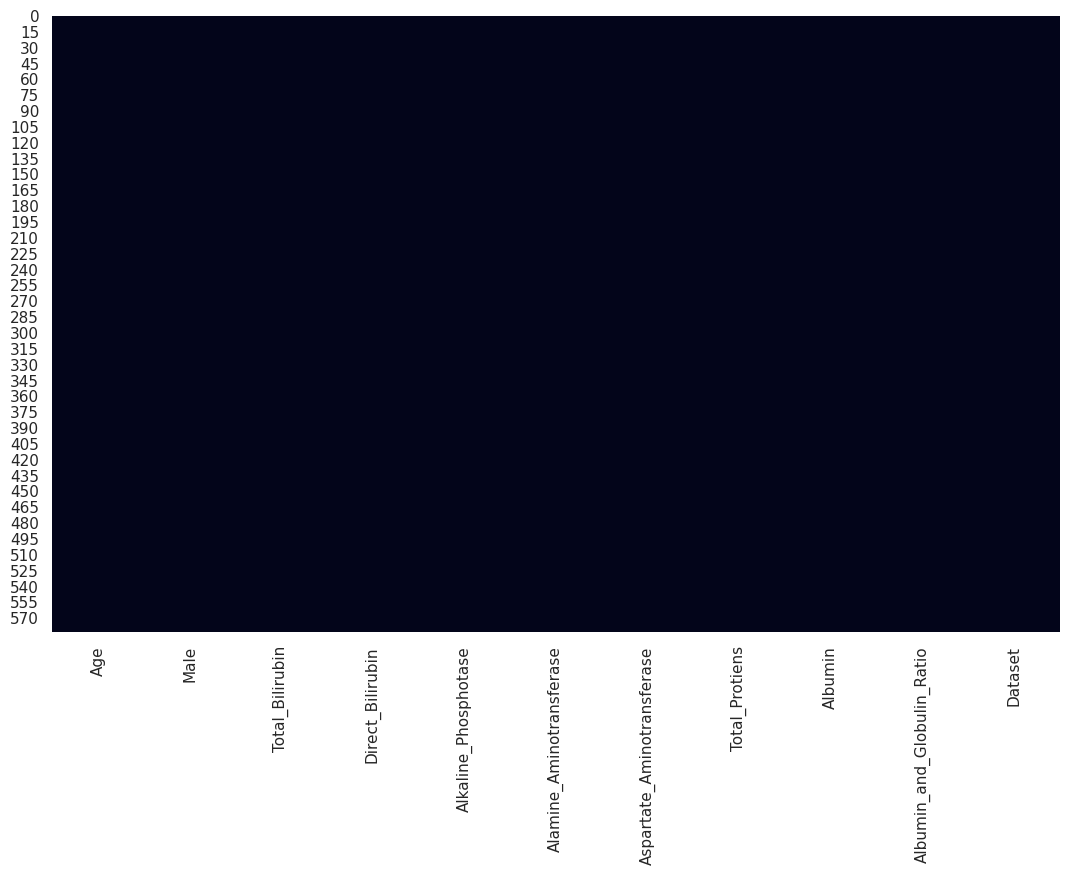

In [ ]:
sns.set(rc={"figure.figsize":(13, 8)})
sns.heatmap(patient_miss_val1.isnull(), cbar=False)

Creating a heatmap, after dealing with categorical columns, may help us better understand the idea behind this dataset. For example, the older you get, the less of Albumin and Globulin ratio you have (negative correlation)

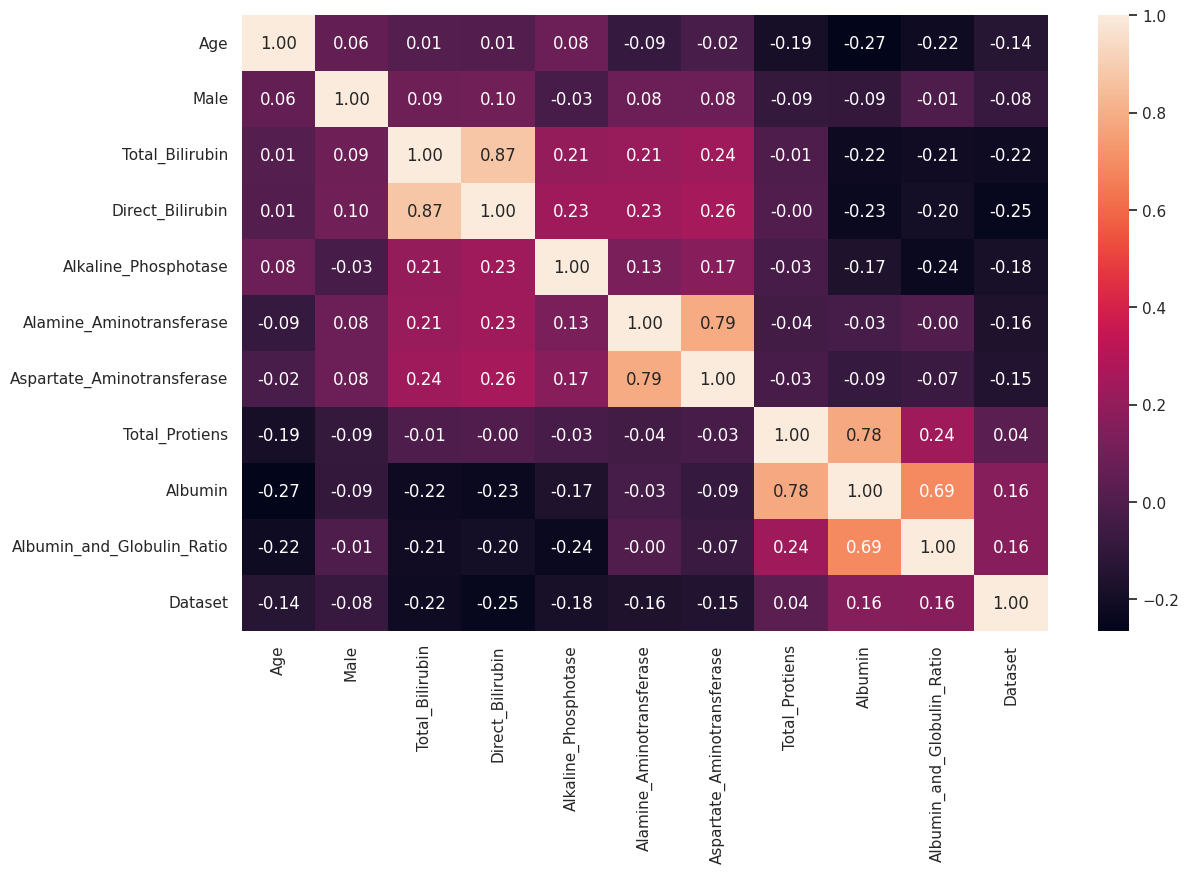

In [ ]:
sns.heatmap(patient_miss_val1.corr(), annot=True, fmt=".02f")
plt.show() #we create the heatmap to analysize the relationship between columns
#for instance, it is clear that

This scatter matrix plot depicts dependencies between 3 feature columns and the target column. As we can notice, we can see that total Bilirubin values contribute to getting a liver disease. The higher the values, the higher the chances to get sick. However, for the other 2 features there is no pattern

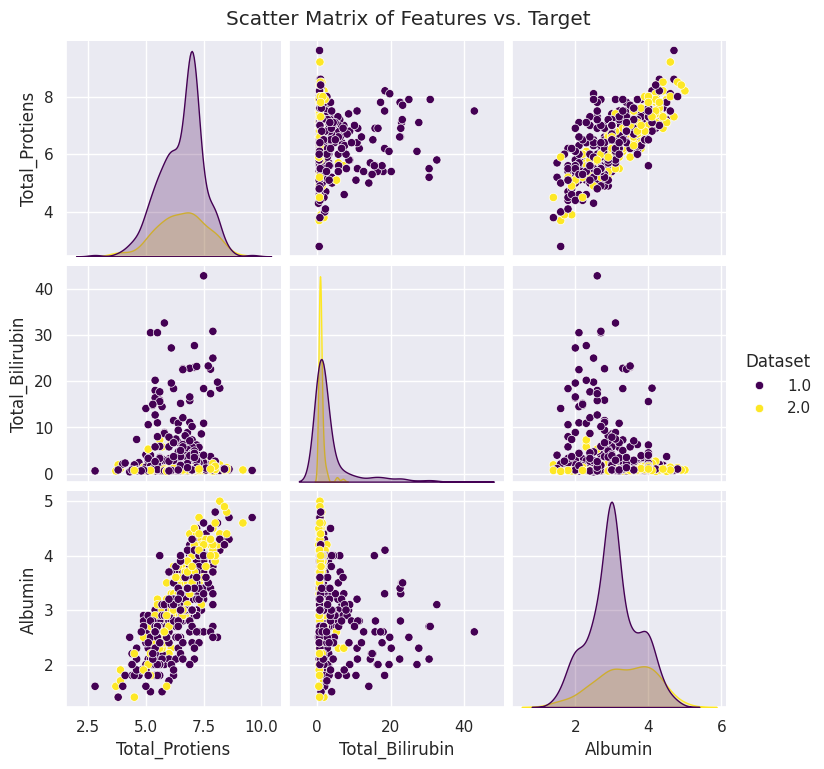

In [ ]:
features = ['Total_Protiens', 'Total_Bilirubin', 'Albumin']
target = 'Dataset'  # Change target to a string

df = patient_miss_val1[features + [target]]

# Plot the pairplot
sns.pairplot(df, hue=target, palette='viridis', diag_kind='kde')
plt.suptitle('Scatter Matrix of Features vs. Target', y=1.02)
plt.show()


After dealing with null values, we have to address the outliers, and we do so using the boxplot (for visualization) and box_stats (for insights). Consequently, we see that outliers are quite dominant

Text(0.5, 1.0, 'Age')

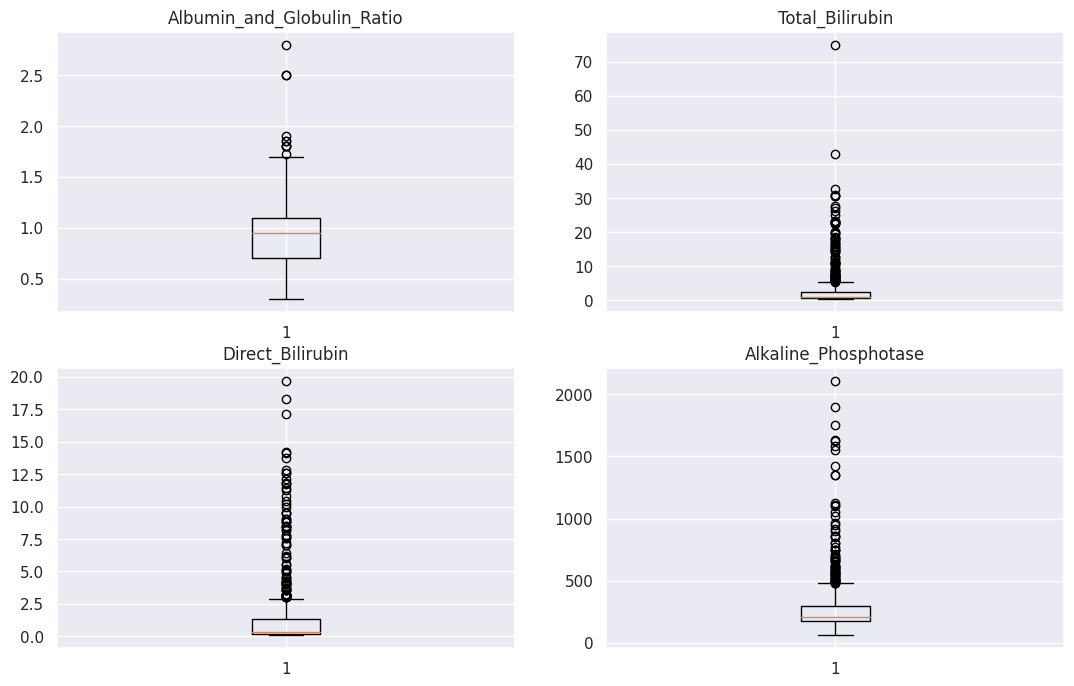

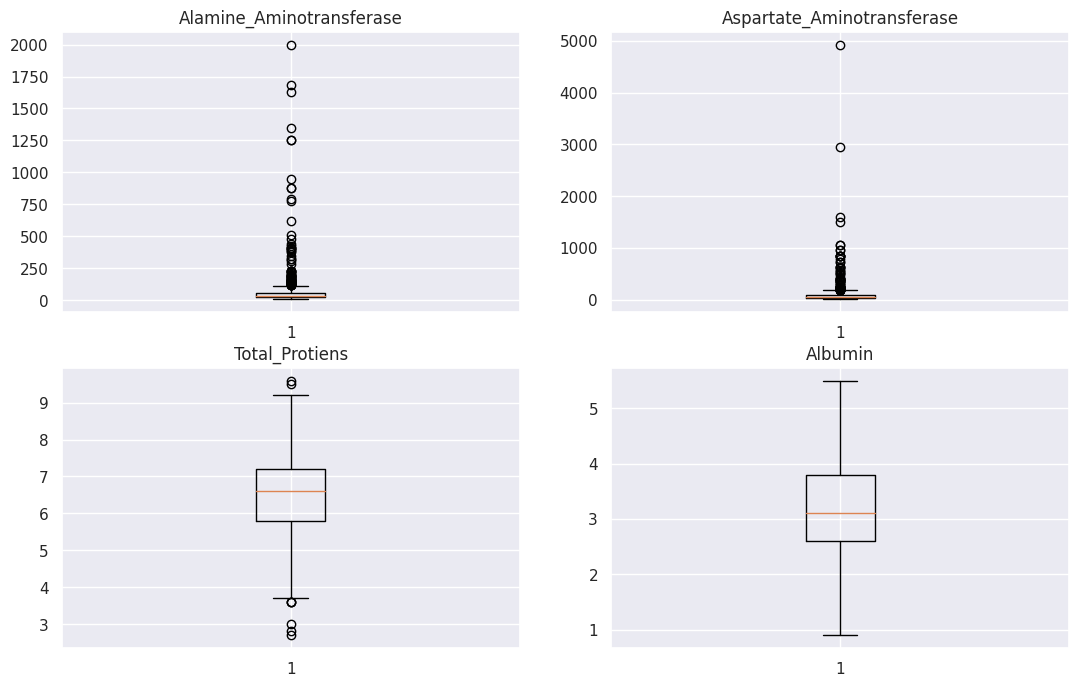

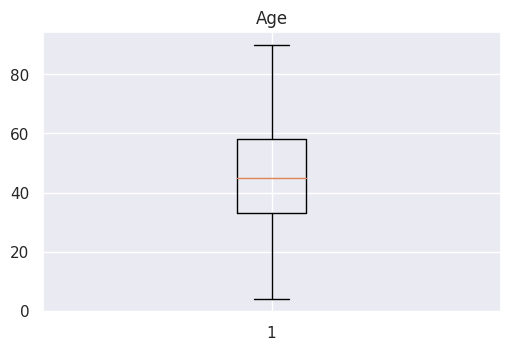

In [ ]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

fig1=plt.figure()
ax5=fig1.add_subplot(2,2,1)
ax6=fig1.add_subplot(2,2,2)
ax7=fig1.add_subplot(2,2,3)
ax8=fig1.add_subplot(2,2,4)

fig2=plt.figure()
ax9=fig2.add_subplot(2,2,1)


ax1.boxplot(x = patient_miss_val1['Albumin_and_Globulin_Ratio'])

ax2.boxplot(x = patient_miss_val1['Total_Bilirubin'])

ax3.boxplot(x = patient_miss_val1['Direct_Bilirubin'])

ax4.boxplot(x = patient_miss_val1['Alkaline_Phosphotase'])

ax5.boxplot(x = patient_miss_val1['Alamine_Aminotransferase'])

ax6.boxplot(x = patient_miss_val1['Aspartate_Aminotransferase'])

ax7.boxplot(x = patient_miss_val1['Total_Protiens'])

ax8.boxplot(x = patient_miss_val1['Albumin'])

ax9.boxplot(x = patient_miss_val1['Age'])


ax1.set_title("Albumin_and_Globulin_Ratio")
ax2.set_title("Total_Bilirubin")
ax3.set_title("Direct_Bilirubin")
ax4.set_title("Alkaline_Phosphotase")
ax5.set_title("Alamine_Aminotransferase")
ax6.set_title("Aspartate_Aminotransferase")
ax7.set_title("Total_Protiens")
ax8.set_title("Albumin")
ax9.set_title("Age")

When computing the box_stats, we pay attention to 'fliers'

In [ ]:

boxplot_stats(patient_miss_val1.Albumin_and_Globulin_Ratio)

[{'mean': 0.9547436521379098,
  'iqr': 0.30000000000000004,
  'cilo': 0.9804931731174512,
  'cihi': 1.019506826882549,
  'whishi': 1.55,
  'whislo': 0.35,
  'fliers': array([1.6 , 1.58, 1.66, 1.6 , 1.6 , 1.7 , 1.8 , 1.7 , 1.58, 1.7 , 1.85,
         1.6 , 2.8 , 2.5 , 2.5 ]),
  'q1': 0.8,
  'med': 1.0,
  'q3': 1.1}]

In [ ]:
boxplot_stats(patient_miss_val1.Total_Bilirubin)

[{'mean': 2.8874785591766727,
  'iqr': 1.2,
  'cilo': 0.8219726924698048,
  'cihi': 0.9780273075301953,
  'whishi': 3.7,
  'whislo': 0.4,
  'fliers': array([10.9,  7.3,  3.9,  6.8,  4.1,  4.1,  6.2,  4. ,  6.8, 18.4,  8.9,
          8.9,  4. ,  5.7,  6.8,  8.6,  5.8,  5.2,  5.3,  5.3,  5.8,  7.3,
         15.9, 18. , 23. , 22.7,  5.8,  4.7,  5.9,  8.7, 11. , 11.5,  5.8,
          4.5, 22.8,  8.9, 14.1, 14.8, 10.6,  8. ,  6.3,  5.8, 27.2,  3.9,
         30.5, 16.4, 14.5, 18.5,  4.5, 23.2,  7.1,  6.7, 22.6,  7.5,  5. ,
          4.9,  4.2,  8.2, 10.9,  7.4, 23.3,  7.9,  7.1,  6.7, 19.8, 30.5,
         32.6, 17.7, 18.4,  3.9,  4.4,  9.4, 30.8, 19.6, 15.8, 20.2, 27.7,
         11.1, 10.2,  4. , 42.8, 15.2, 16.6, 17.3, 22.5, 15.6, 12.1, 25. ,
         15. , 12.7]),
  'q1': 0.8,
  'med': 0.9,
  'q3': 2.0}]

In [ ]:
boxplot_stats(patient_miss_val1.Direct_Bilirubin)

[{'mean': 1.3060034305317323,
  'iqr': 0.8,
  'cilo': 0.14798179497986985,
  'cihi': 0.25201820502013017,
  'whishi': 2.2,
  'whislo': 0.1,
  'fliers': array([ 5.5,  4.1,  3. ,  3. ,  3.2,  8.8,  4.5,  4.5,  2.8,  3.2,  4. ,
          2.7,  2.4,  2.3,  2.3,  3. ,  3.6,  7. ,  8.2, 11.3, 10.2,  2.5,
          2.5,  4. ,  4.9,  5. ,  2.7,  2.3, 12.6,  4. ,  7.6,  9. ,  5. ,
          4.6,  3.2,  3. , 11.8, 14.2,  8.9,  6.4,  9.5,  2.3, 12.6,  3.3,
          3.6, 11.4,  4.3,  2.6,  2.7,  2.3,  3.9,  5.1,  3.6, 12.8,  4.3,
          3.7,  3.2, 10.4, 17.1, 14.1,  8.8,  8.5,  2.9,  5.2, 18.3,  9.5,
          7.2, 11.7, 10.8,  6.1,  4.2,  2.5, 19.7,  7.7,  7.6,  8.5, 11.8,
          9.5,  6. , 13.7,  8.2,  8.4]),
  'q1': 0.2,
  'med': 0.2,
  'q3': 1.0}]

In [ ]:

boxplot_stats(patient_miss_val1.Alkaline_Phosphotase)

[{'mean': 278.0497427101201,
  'iqr': 102.0,
  'cilo': 191.3676788599334,
  'cihi': 204.6323211400666,
  'whishi': 430.0,
  'whislo': 75.0,
  'fliers': array([ 699.,  490.,  610.,  482.,  542.,  482.,  630.,  470., 1620.,
          915.,  538.,  486.,  661., 1580., 1630.,  802., 1896.,  512.,
          462.,  750., 1050.,  599.,  962.,  950.,  750.,  482., 1020.,
          562.,  614.,  664., 1420., 2110.,  498.,  480.,  680.,  859.,
          901.,  575.,  588.,  527.,  574.,  458.,  650.,  621.,  558.,
          490.,  580.,  719.,  554.,  555.,  862.,  592.,  450., 1350.,
         1350., 1750., 1550., 1100.,  686.,  850.,  805.,  450.,  466.,
          612.,  515.,  560.,  500.]),
  'q1': 180.0,
  'med': 198.0,
  'q3': 282.0}]

In [ ]:

boxplot_stats(patient_miss_val1.Alamine_Aminotransferase)

[{'mean': 67.82675814751286,
  'iqr': 28.0,
  'cilo': 29.179362824295445,
  'cihi': 32.820637175704555,
  'whishi': 95.0,
  'whislo': 10.0,
  'fliers': array([ 168.,  116.,  875.,  875., 1680.,  102.,  123., 1630.,  194.,
          119.,  412.,  404.,  412.,  220.,  126.,   97.,  308.,  181.,
         1350., 1250.,  482.,  322.,  133.,  140.,   99.,  378.,  112.,
          114.,  118.,  107.,  790.,  950.,  149.,  390.,  120.,  178.,
          179.,  198.,  110.,  115.,  142.,  137.,  157.,  141.,  284.,
          440.,  102.,  425.,  159.,  119.,  622.,  779.,  132.,  154.,
          102.,   96.,  133.,  196.,  119.,  110.,  382.,  321.,  233.,
          173.,  131.]),
  'q1': 25.0,
  'med': 31.0,
  'q3': 53.0}]

In [ ]:

boxplot_stats(patient_miss_val1.Aspartate_Aminotransferase)

[{'mean': 83.86792452830188,
  'iqr': 47.0,
  'cilo': 31.943930455067353,
  'cihi': 38.05606954493265,
  'whishi': 140.0,
  'whislo': 10.0,
  'fliers': array([ 441.,  731.,  731.,  850.,  178.,  960.,  178.,  406.,  150.,
          142.,  152.,  350.,  850.,  794.,  850.,  400.,  202.,  161.,
          405.,  285.,  149., 1600., 1050.,  275.,  233.,  350.,  187.,
          602.,  247., 1050., 1500.,  180.,  231.,  156.,  500.,  250.,
          232.,  143.,  176.,  145.,  190.,  850.,  180.,  141.,  511.,
          497.,  844.,  368.,  248.,  190.,  401.,  221.,  235.,  185.,
          230.,  181.,  200.,  152.,  186.,  220.,  348.,  186.,  330.,
          562.,  384.,  367.,  143.]),
  'q1': 23.0,
  'med': 35.0,
  'q3': 70.0}]

In [ ]:

boxplot_stats(patient_miss_val1.Total_Protiens)

[{'mean': 6.550428816466552,
  'iqr': 1.1999999999999993,
  'cilo': 6.721972692469804,
  'cihi': 6.878027307530195,
  'whishi': 8.6,
  'whislo': 4.3,
  'fliers': array([3.9, 3.7, 3.9, 3.8, 4. , 2.8, 3.8, 4.1, 9.6, 9.2]),
  'q1': 5.9,
  'med': 6.8,
  'q3': 7.1}]

In [ ]:

boxplot_stats(patient_miss_val1.Albumin)

[{'mean': 3.130531732418525,
  'iqr': 1.0,
  'cilo': 2.934977243724837,
  'cihi': 3.065022756275163,
  'whishi': 5.0,
  'whislo': 1.4,
  'fliers': array([], dtype=float64),
  'q1': 2.7,
  'med': 3.0,
  'q3': 3.7}]

In [ ]:

boxplot_stats(patient_miss_val1.Age)

[{'mean': 46.55746140651801,
  'iqr': 25.0,
  'cilo': 46.37443109312093,
  'cihi': 49.62556890687907,
  'whishi': 85.0,
  'whislo': 4.0,
  'fliers': array([], dtype=float64),
  'q1': 35.0,
  'med': 48.0,
  'q3': 60.0}]

Text(0, 0.5, 'Frequency')

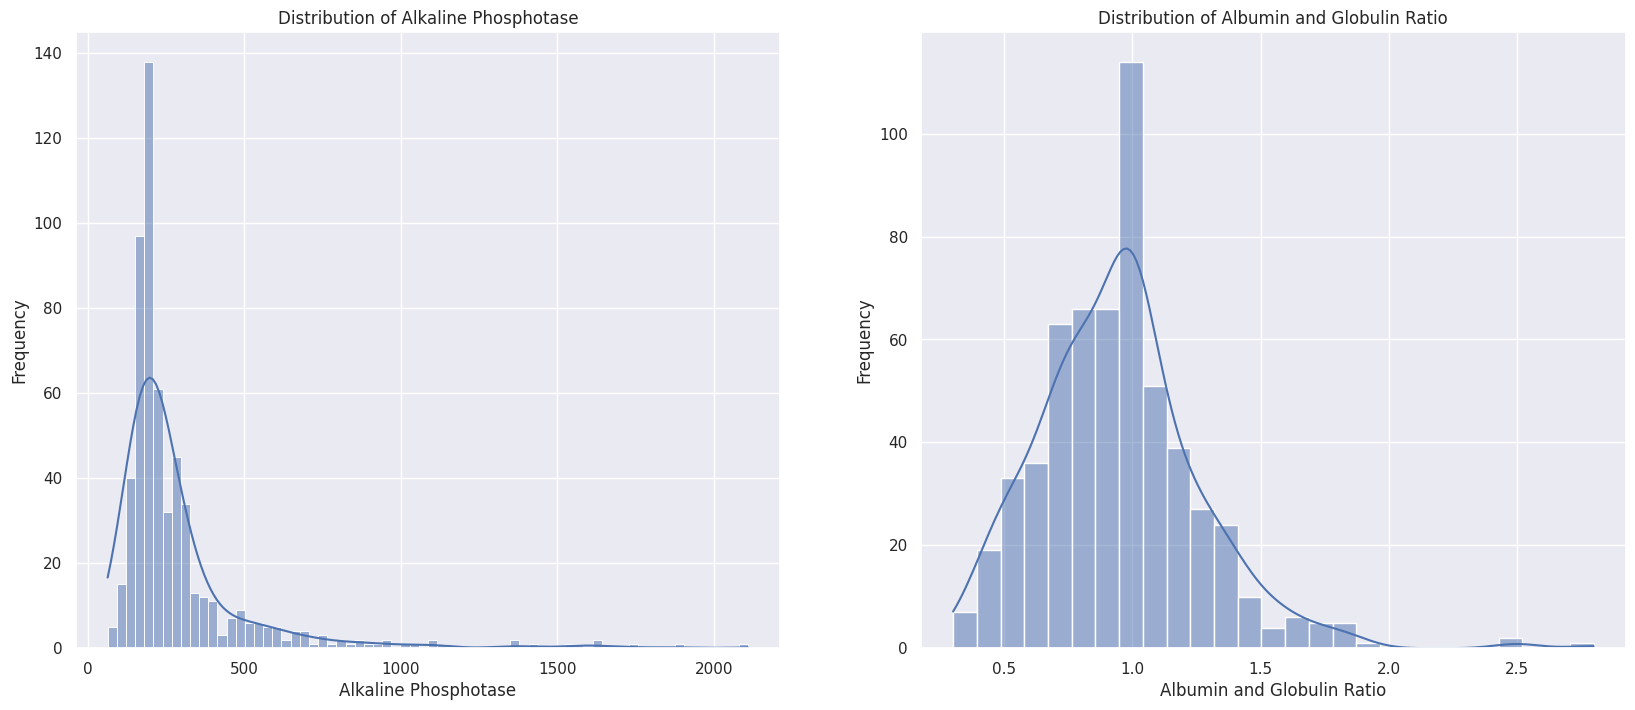

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.histplot(patient['Alkaline_Phosphotase'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Alkaline Phosphotase')
ax[0].set_xlabel('Alkaline Phosphotase')
ax[0].set_ylabel('Frequency')

sns.histplot(patient['Albumin_and_Globulin_Ratio'], kde=True, ax=ax[1])
ax[1].set_title('Distribution of Albumin and Globulin Ratio')
ax[1].set_xlabel('Albumin and Globulin Ratio')
ax[1].set_ylabel('Frequency')

Since we have many outliers, we gotta use more advanced techniques compared to boxplots like Isolation Forest, Elliptic Ensemble or Local Outlier Factor. Next step is deciding which one to use. Elliptic Ensemble is for elliptic shapes, whilst Isolation Forest works better on huge datasets. This leaves us with Local Outlier Factor which works pretty well with varying densities (as we can see in the plots below). Aditionally, we standartize the data to improve perfomance

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(patient_miss_val1.drop(columns=['Dataset'])) # we drop the target column and apply scaling

In [ ]:
model = LocalOutlierFactor(n_neighbors=2)
patient_miss_val1['lof'] = model.fit_predict(scaled_features) #we create a column 'lof' containing 1 and -1

In [ ]:
patient_miss_val1['lof'].value_counts() # -1 is for outliers and 1 is for non-outliers

lof
 1    513
-1     70
Name: count, dtype: int64

Now that we found the outliers, we can either drop the -1, or we can replace those values. Since we tried first to drop them, and then we tried to replace them with the median instead, we will stick to replacing because it yielded better results

In [ ]:
outliers=patient_miss_val1['lof']==-1 #we select the outliers

In [ ]:
for column in patient_miss_val1.columns:
    mode = patient_miss_val1[column].mode()
    if not mode.empty:
        mode_v = mode[0]
        patient_miss_val1[column] = np.where(outliers, mode_v, patient_miss_val1[column]) #we replace for each column

In [ ]:
patient_miss_val1.drop(['lof'], axis=1, inplace=True) #we finally drop the column 'lof'

In [ ]:
patient_miss_val1.head()

,Age,Male,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [ ]:
patient_miss_val1.columns

Index(['Age', 'Male', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

#Machine Learning

Next, the train_test_split function splits the dataset into test and training sets (as a rule 30% test and 70% training). X comprises our feature columns, whilst y represents our target column

In [ ]:


X=patient_miss_val1[['Age', 'Male', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patient_miss_val1['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random state for stability

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train) #we use here scaling as well (for X_train and X_test only)
scaler
scaler.scale_

array([ 15.312416  ,   0.3932277 ,   5.33108088,   2.72940559,
       216.71697579, 160.43257735, 152.16713978,   0.97276   ,
         0.71420538,   0.29963114])

In [ ]:
X_scaled_train = scaler.transform(X_train)
X_scaled_train

array([[ 9.09488783e-01,  4.86172435e-01, -3.91019921e-01, ...,
         4.54538492e-01, -1.99385169e-01,  1.16141577e-01],
       [-4.80194711e-03,  4.86172435e-01,  2.42266840e+00, ...,
         3.51738212e-01, -7.59448156e-01, -1.21883317e+00],
       [-3.96640831e-01,  4.86172435e-01,  5.23635672e+00, ...,
         1.37974101e+00, -6.19432409e-01, -1.55257686e+00],
       ...,
       [ 9.09488783e-01,  4.86172435e-01, -3.91019921e-01, ...,
         4.54538492e-01, -1.99385169e-01,  1.16141577e-01],
       [-1.89868989e+00, -2.05688338e+00, -4.47293687e-01, ...,
         5.57338772e-01,  1.90085103e+00,  2.45234738e+00],
       [-1.89868989e+00,  4.86172435e-01, -3.72261999e-01, ...,
         3.51738212e-01,  1.48080379e+00,  1.95173185e+00]])

In [ ]:
scaler1 = preprocessing.StandardScaler().fit(X_test)
scaler1
scaler1.scale_

array([1.60641063e+01, 4.27083130e-01, 5.04943238e+00, 2.57583141e+00,
       2.69261820e+02, 1.37530775e+02, 1.79577086e+02, 9.12289965e-01,
       7.06575530e-01, 2.64941492e-01])

In [ ]:
X_scaled_test = scaler1.transform(X_test)
X_scaled_test

array([[-1.78570247,  0.56195149, -0.29593142, ...,  1.60788477,
         2.11887165,  1.39515872],
       [-2.22145656,  0.56195149, -0.37514825, ...,  0.7309706 ,
         0.84512247,  0.26283325],
       [ 0.76657148,  0.56195149,  0.55564944, ...,  0.84058487,
         0.13748404, -0.56753877],
       ...,
       [-0.60294137,  0.56195149, -0.37514825, ...,  0.84058487,
         1.83581627,  2.15004236],
       [-0.16718728, -1.77951304, -0.43456087, ..., -2.22861473,
        -2.41001432, -1.81309678],
       [ 0.45531856, -1.77951304,  1.0507546 , ...,  0.18289924,
        -0.28709902, -0.86949223]])

After preprocessing and splitting, we will use machine learning in order to train models like Random Forest Classifier, AdaBoostClassifier, LogisticRegression and trying to improve them with Tunning

In [ ]:


clf=RandomForestClassifier(n_estimators=5)

clf.fit(X_scaled_train,y_train) #it trains the model

y_pred=clf.predict(X_scaled_test)

In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.76


We tried the same technique (random forest) but with different n_estimators, and we concluded that n_estimators=142 provided more stable results compared to n_estimators=5. Therefore, we will try Tunning since we noticed the improvement

In [ ]:
clf1=RandomForestClassifier(n_estimators=142, max_features=3)

clf1.fit(X_scaled_train,y_train)

y_pred=clf1.predict(X_scaled_test)

In [ ]:
print("Accuracy 1:", metrics.accuracy_score(y_test, y_pred))

Accuracy 1: 0.7428571428571429


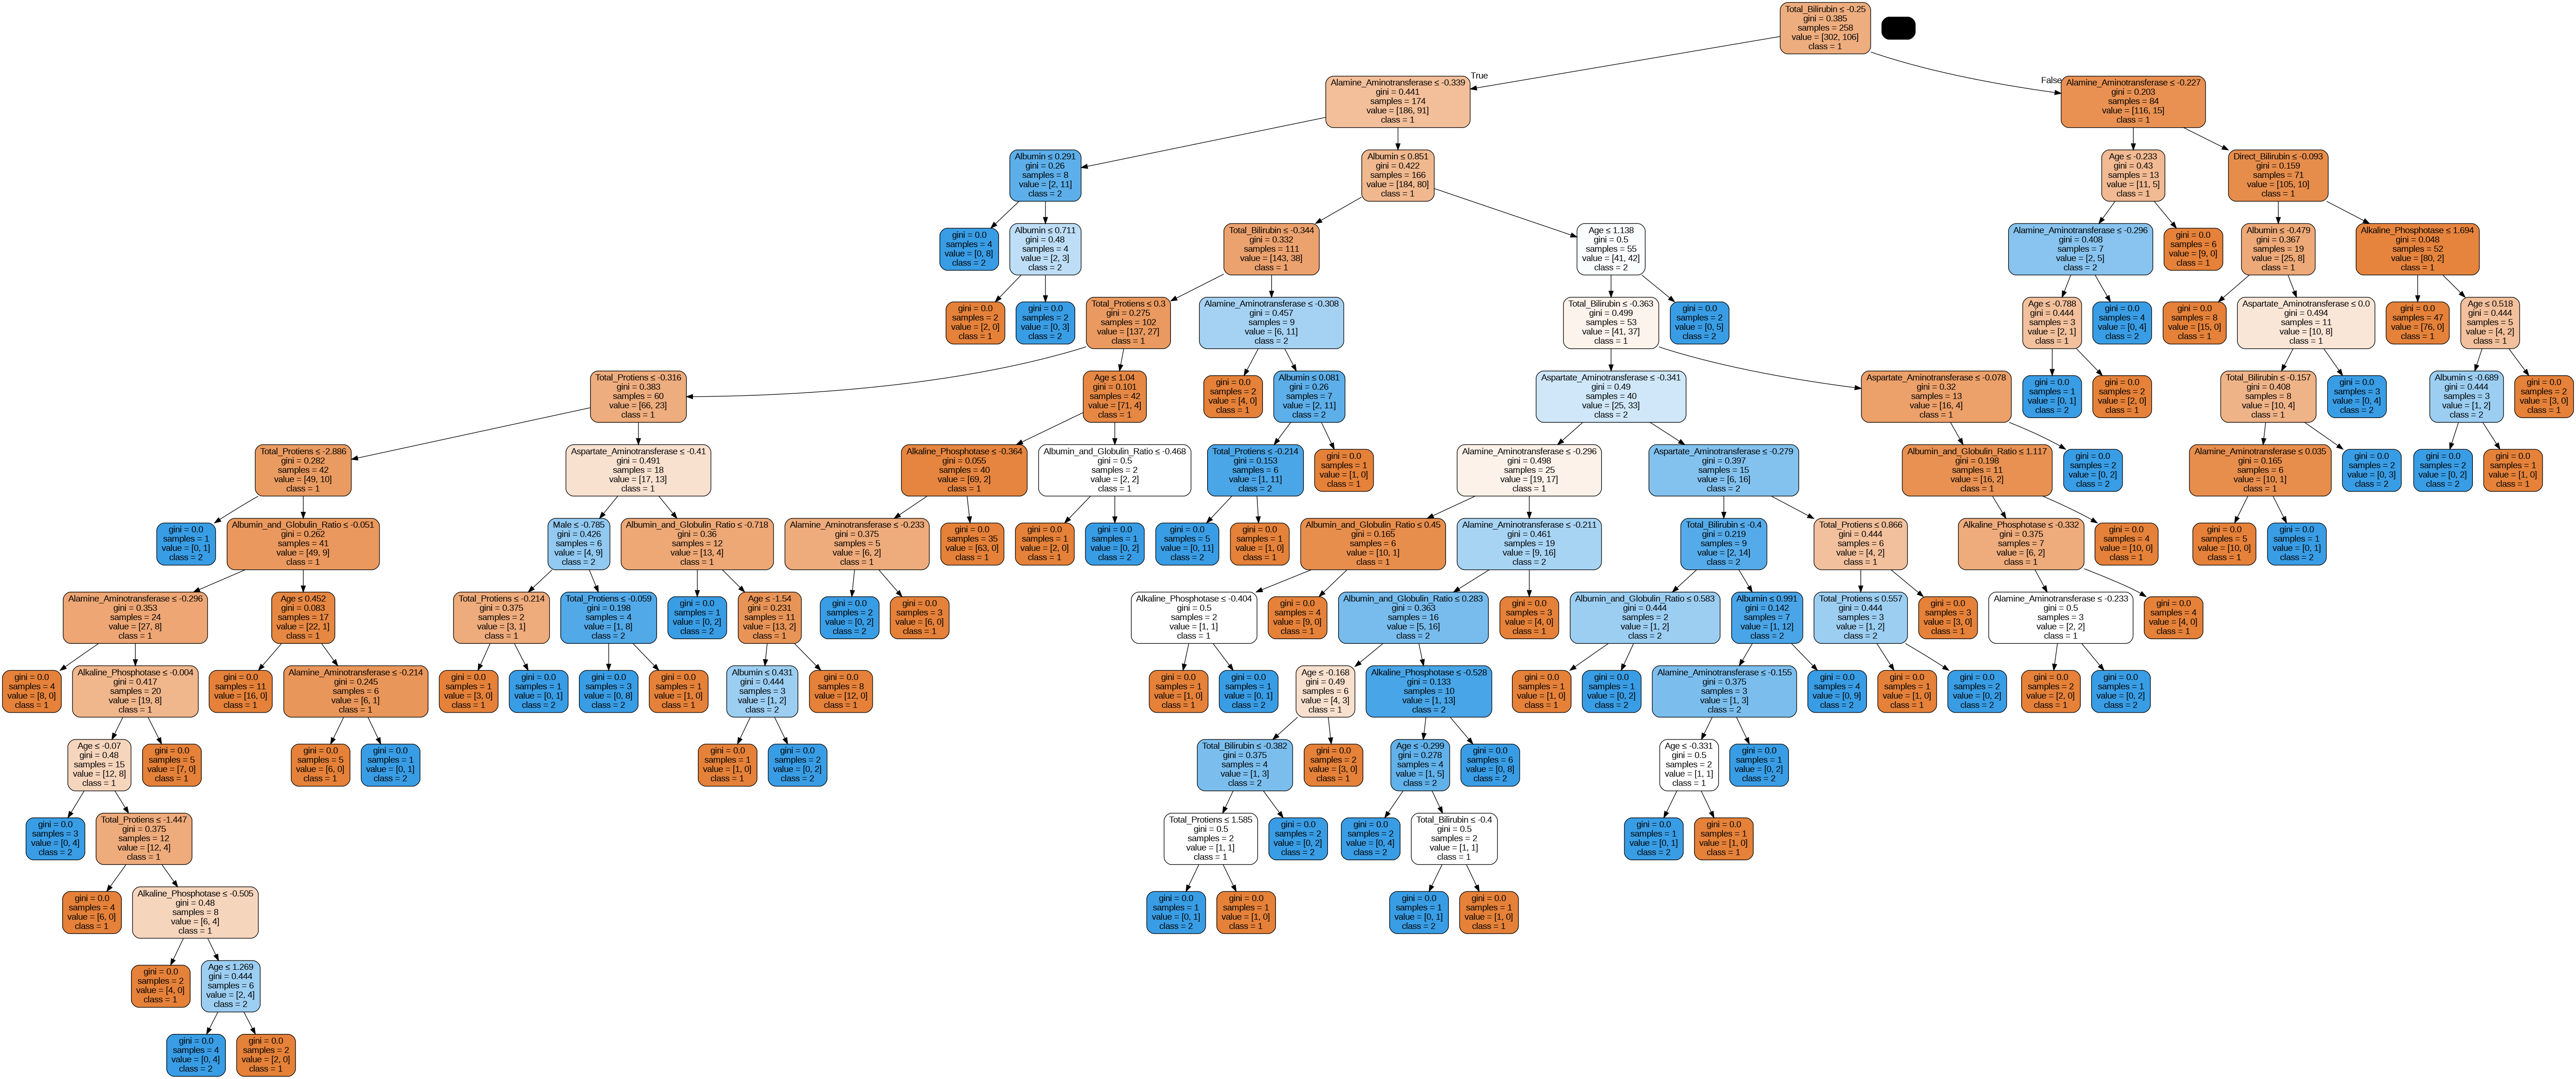

In [ ]:
tree_index = 0
tree = clf1.estimators_[tree_index]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns,
                class_names=["1", "2"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_{}.png'.format(tree_index))
Image(graph.create_png())

In [ ]:


param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf1, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1) #Tunning uses GridSeacrh

grid_search.fit(X_scaled_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

predictions = best_model.predict(X_scaled_test)
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)


new_instance = [[0] * X_scaled_train.shape[1]]
new_prediction = best_model.predict(new_instance)
print("Prediction for new instance:", new_prediction)


Best Parameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 200}
Model Accuracy: 0.7485714285714286
Prediction for new instance: [1.]


AdaBoost is another ML technique which enhances classification performance by focusing on the errors of previous models. Since we are not dealing with noisy data, we will try this one

In [ ]:


ada_clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
ada_clf.fit(X_scaled_train, y_train)

predictions = ada_clf.predict(X_scaled_test)

accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

new_instance = [[0]*10] #to be sure we have 10 features, not less, not more
new_prediction = ada_clf.predict(new_instance)
print("Prediction for new instance:", new_prediction)

Model Accuracy: 0.7371428571428571
Prediction for new instance: [1.]


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

base_estimator = DecisionTreeClassifier(max_depth=5)
ada_clf = AdaBoostClassifier(base_estimator=base_estimator, random_state=0)

grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_scaled_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

predictions = best_model.predict(X_scaled_test)

accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

new_instance = [[0]*X_scaled_train.shape[1]]
new_prediction = best_model.predict(new_instance)
print("Prediction for new instance:", new_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200}
Model Accuracy: 0.7028571428571428
Prediction for new instance: [1.]


MSE measures how close your predictions are to the true values. It is calculated as the differences between predicted and actual values.With target labels of 1 and 2, 0.16 suggests that the model is making some prediction errors. Replacing with mode instead of median has lowered the error from 0.19 to 0.16

Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors. It then uses this relationship to predict the value of one of those factors based on the other

In [ ]:
model = LogisticRegression()
model.fit(X_scaled_train, y_train)

y_pred = model.predict(X_scaled_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

         1.0       0.78      0.95      0.86       131
         2.0       0.56      0.20      0.30        44

    accuracy                           0.76       175
   macro avg       0.67      0.58      0.58       175
weighted avg       0.73      0.76      0.72       175



Last but not least, we tried a more specific model, K-Neighbourghs, and noticed that it is not as optimal as models used above

In [ ]:

# antrenam KNN modelul
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = knn.predict(X_scaled_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.69


#Conclusion

Taking everything into account, this dataset was used to assess prediction algorithms related to liver diseases of Indian people.
After cleaning and processing the data, despite dealing with myriads of outliers, we were able to train multiple ML models in order to predict the target column "Dataset", containing 2 values: "1" mean a person having liver disease present and "2" represent liver disease not present. In the end, our biggest achievement was increasing the accuracy from 69% to 76% by standardization (StandardScaler), and then opting to replace the outliers with mode instead of dropping the outliers. Our most optimal model turned to be Logistic Regression. Beside Logistic Regression, we also implemented Random Forests, AdaBoost and  K-Neighbourghs